<a href="https://colab.research.google.com/github/jayu071/Cardiovascular_Risk_Prediction_JN/blob/main/JN_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project title
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:#b31aff;font-family:verdana;">Cardiovascular Risk Prediction(Supervised ML-Classification)</h1></b></marquee>


<html>
<img src=" https://www.udmi.net/wp-content/uploads/2020/02/UDMI_Cardiovascular-Disease.png " width="400" height="300" alt="bike">
</html>

# Cardiovascular Prediction
### Will a patient have a 10 year risk of developing a cardio vascular diseases?

### Table of contents
1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Feature Selection](#paragraph2)
4. [Feature Scaling](#paragraph3)
5. [Test - Train Split](#paragraph4)
6. [Resampling](#paragraph5)
7. [Model Pipeline](#paragraph6)
8. [Modelling & Evaluation](#paragraph7)
9. [Apply model](#paragraph8)

## Introduction <a name="introduction"></a>

**Problem:**
The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

**Source:**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

**Attributes:**

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [2]:
# importing libraries and magic functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [4]:
# read data,id column assign as a index
df = pd.read_csv('/content/drive/MyDrive/Almabetter /CapstoneProject/Capstone 3_Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',index_col ="id")
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [5]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


not any duplicated entries in data

In [6]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [7]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (3390, 16) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
age,int64,3390,39,0,0.000000
education,float64,3303,4,87,2.566372
sex,object,3390,2,0,0.000000
is_smoking,object,3390,2,0,0.000000
cigsPerDay,float64,3368,32,22,0.648968
BPMeds,float64,3346,2,44,1.297935
prevalentStroke,int64,3390,2,0,0.000000
prevalentHyp,int64,3390,2,0,0.000000
diabetes,int64,3390,2,0,0.000000
totChol,float64,3352,240,38,1.120944


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4adc52b590>,
      dtype=object)

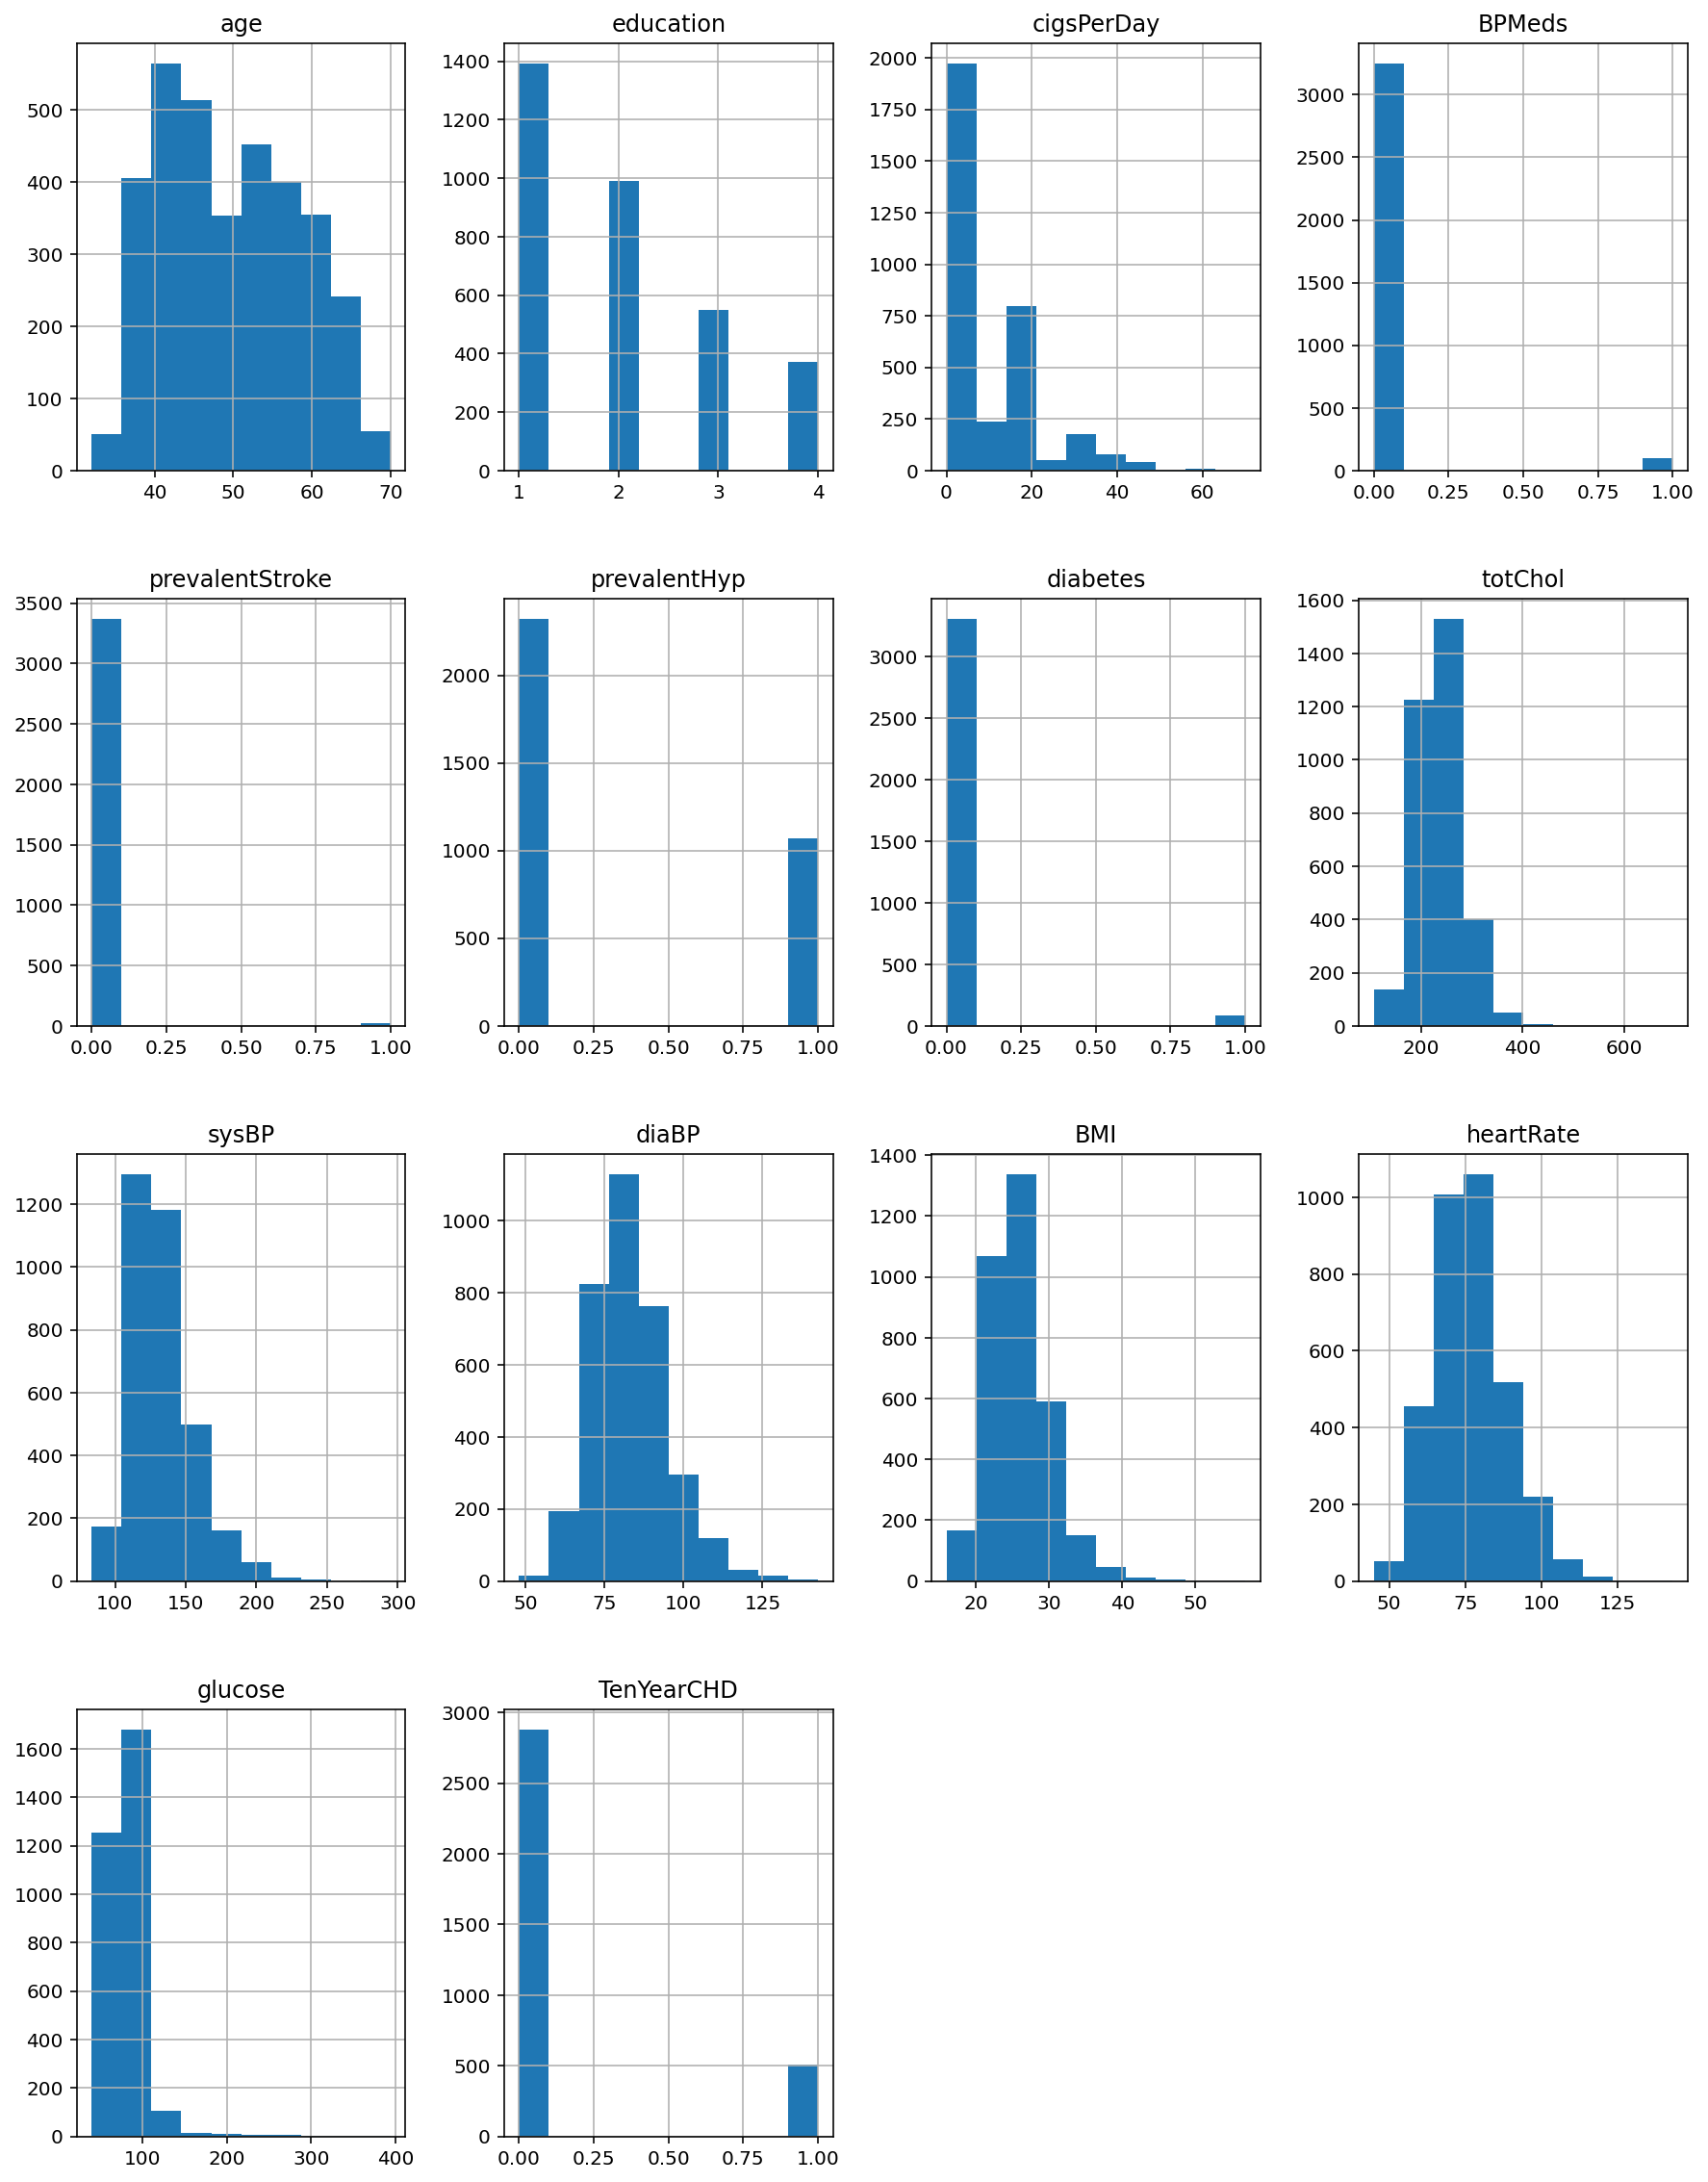

In [8]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<Figure size 864x864 with 0 Axes>

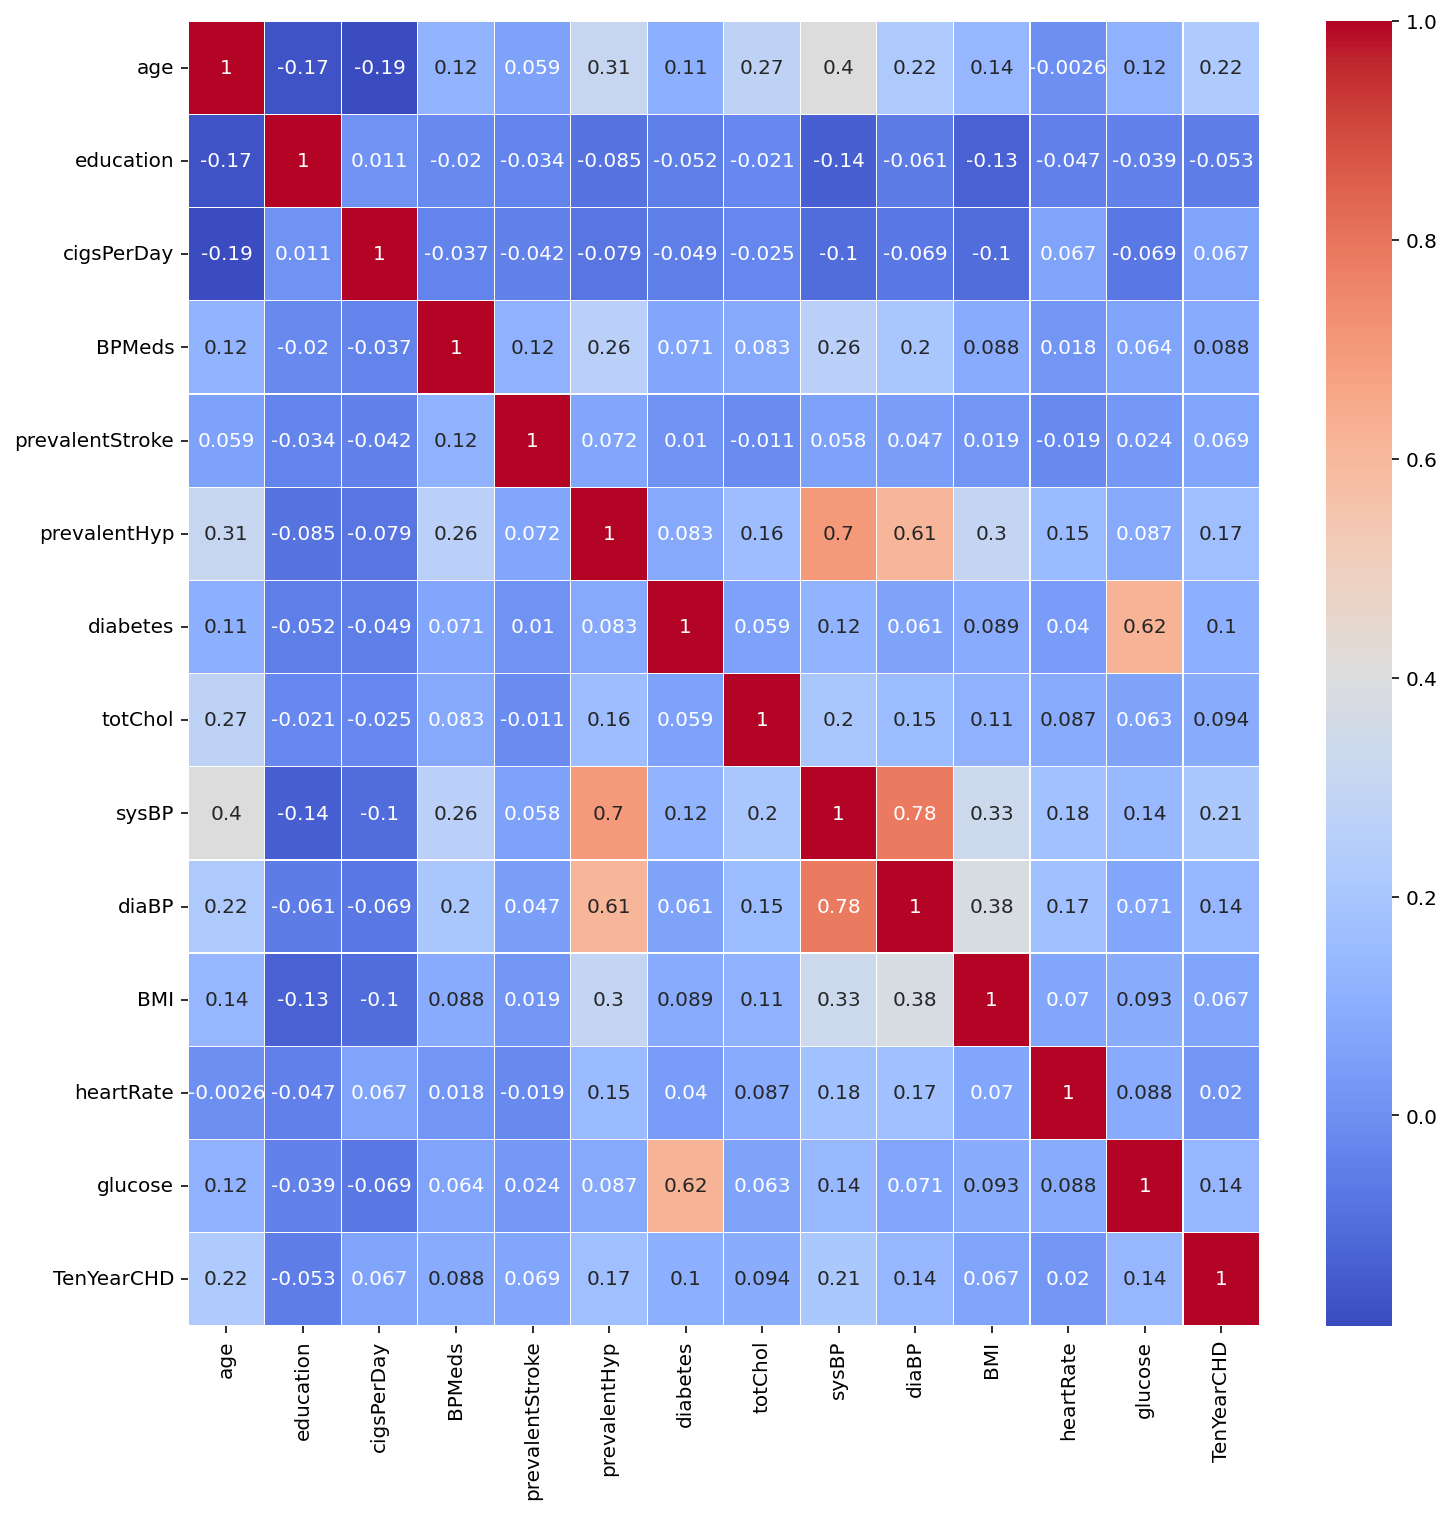

In [9]:
# checking which features are correlated with each other and are correlated with the outcome variable
df_corr = df.corr()
plt.figure(figsize=(12,12))
#cmap use for colour palette , linewidths : set the width of the lines that divide the cells, 
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(df_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

**Conclusions from Heatmap:**

We are dropping the column *education* because a education not much related to our target parameter and also not affect on cardiovascular risk.

In [10]:
# Dropping column education
df = df.drop(['education'], axis=1)

In [11]:
df1 = df[df.isna().any(axis=1)]
df1

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
8,41,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,61,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,46,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,46,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,46,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0
3378,39,F,YES,NaN,0.0,0,0,0,197.0,126.5,76.5,19.71,55.0,63.0,0


In [12]:
#Count Total Number of Null Values
pd.isnull(df).sum().sum()

423

from 3390 rows, 386 rows contain 423 null values, So we are dropping 386 data entries for better prediction of our model ,we have enogh data to test train model after drop small amount of rows

In [13]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
print('\n \n features available in filtered data: \n',df.columns)
print('\n shape of filtered data:',df.shape)

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


 
 features available in filtered data: 
 Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

 shape of filtered data: (3004, 15)


In [14]:
df.groupby(["sex","TenYearCHD",])["TenYearCHD"].count()

sex  TenYearCHD
F    0             1452
     1              205
M    0             1095
     1              252
Name: TenYearCHD, dtype: int64

Conclusion From Data: Male have more Cardiovascular Risk compare to Female

In [15]:
df.groupby(["sex","TenYearCHD","is_smoking",'prevalentHyp', 'diabetes'])["TenYearCHD"].count()

sex  TenYearCHD  is_smoking  prevalentHyp  diabetes
F    0           NO          0             0           575
                                           1             7
                             1             0           283
                                           1            14
                 YES         0             0           455
                                           1             7
                             1             0           108
                                           1             3
     1           NO          0             0            41
                                           1             1
                             1             0            76
                                           1             8
                 YES         0             0            49
                                           1             1
                             1             0            26
                                           1             3
M   

## Outliner Detection

<Figure size 1440x432 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

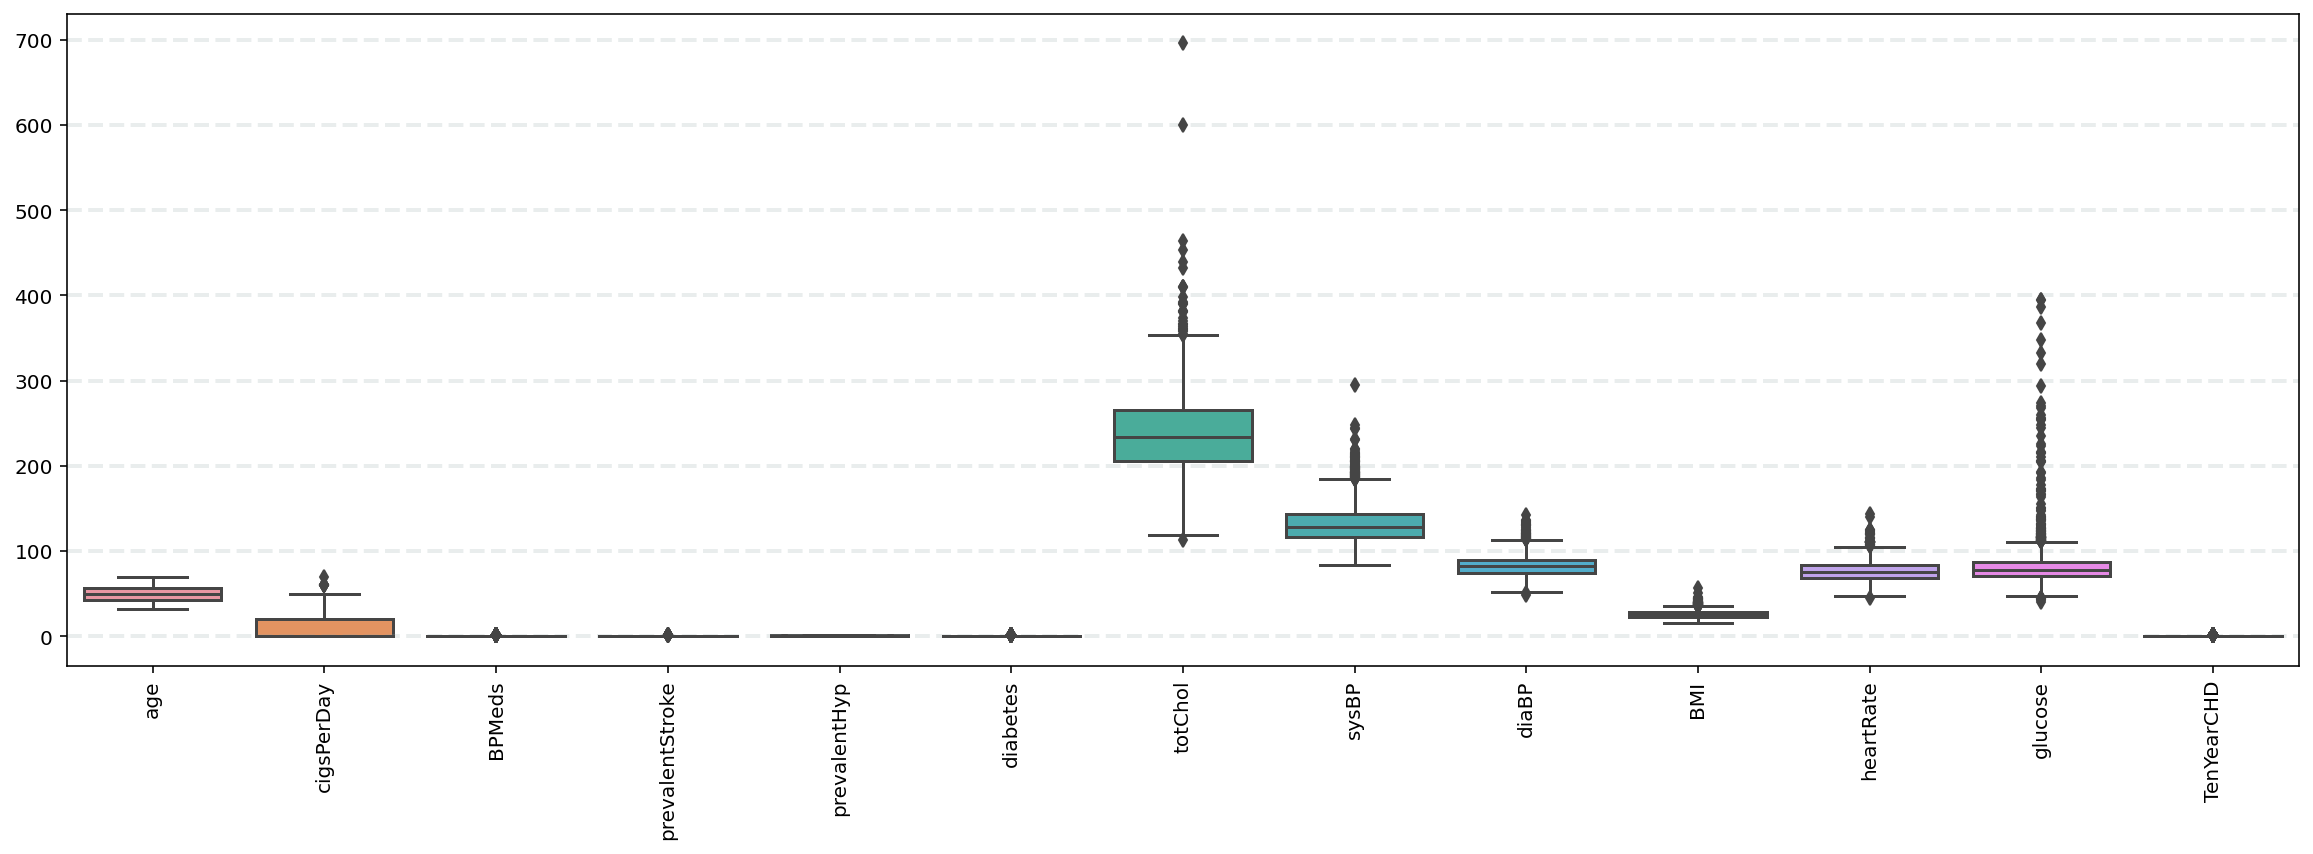

In [16]:
#checking for outliers
plt.figure(figsize=(20,6))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = df)    #box plot of le_df data frame raw data
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
423,52,F,NO,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
512,51,M,YES,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


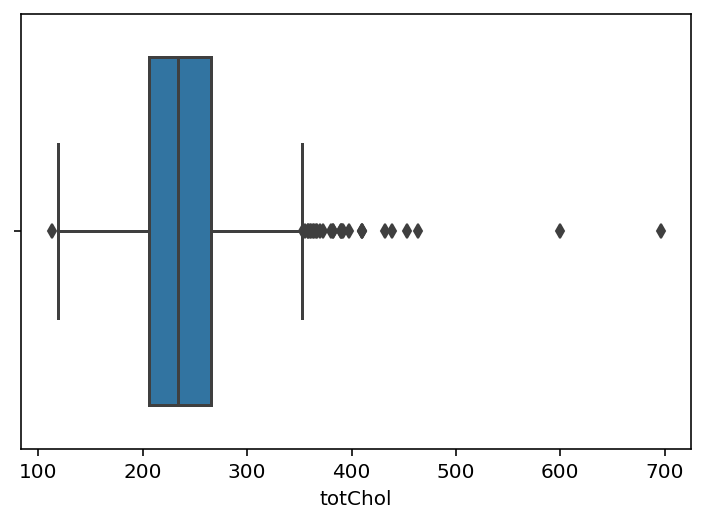

In [17]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


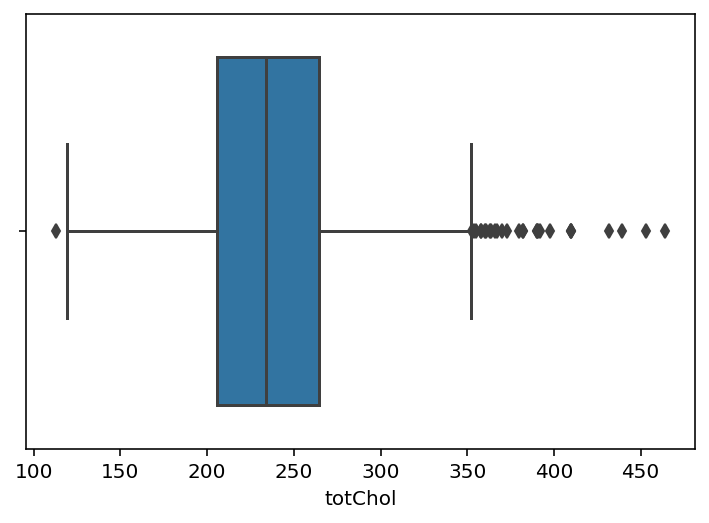

In [18]:
# Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 500].index)
sns.boxplot(df.totChol)

## Encoding Data

In [19]:
from sklearn.preprocessing import  LabelEncoder
# Encode labels of multiple columns at ones using LabelEncoder
le_df= df.apply(LabelEncoder().fit_transform)
le_df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
1,4,1,0,0,0,0,1,0,73,151,88,903,24,30,0
2,14,0,1,10,0,0,0,0,111,48,34,129,40,49,0
3,18,1,1,19,0,0,1,0,94,132,68,783,20,49,1
4,32,0,1,22,0,0,0,0,102,89,62,627,22,32,0
5,29,0,0,0,0,0,1,0,133,174,126,1063,37,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,29,0,0,0,0,0,1,0,78,174,64,679,55,68,0
3385,28,0,0,0,0,0,0,0,122,63,50,865,22,58,0
3386,14,0,0,0,0,0,0,0,60,21,6,247,32,39,0


## Feature Selection

In [20]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X=le_df.drop('TenYearCHD',axis=1) #independent columns
y=le_df['TenYearCHD']  #target column i.e TenYearCHD

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs        Score
9          sysBP  2901.680864
11           BMI  2483.911763
0            age   677.722400
8        totChol   584.674641
10         diaBP   523.316436
13       glucose   277.945458
3     cigsPerDay   126.371698
6   prevalentHyp    56.113337
7       diabetes    26.714591
4         BPMeds    22.323602
1            sex    13.036171


In [21]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,2901.680864
11,BMI,2483.911763
0,age,677.722400
8,totChol,584.674641
10,diaBP,523.316436
13,glucose,277.945458
3,cigsPerDay,126.371698
6,prevalentHyp,56.113337
7,diabetes,26.714591
4,BPMeds,22.323602


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

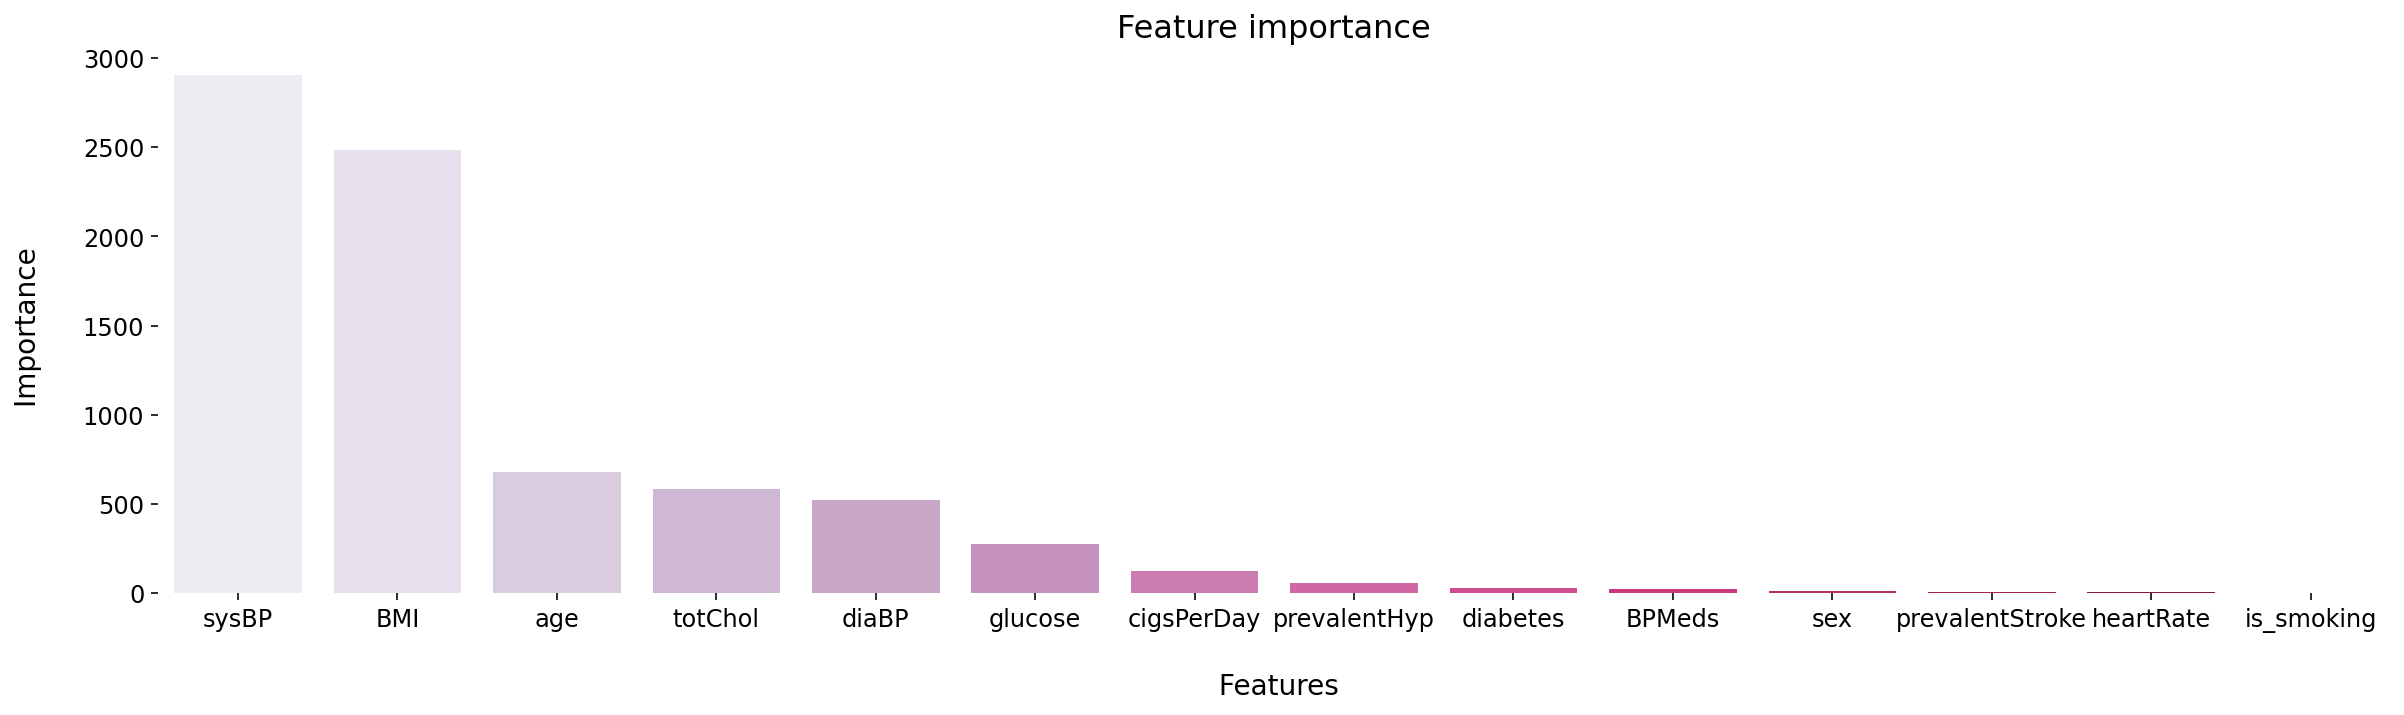

In [22]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "PuRd")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'BMI',
 'age',
 'totChol',
 'diaBP',
 'glucose',
 'cigsPerDay',
 'prevalentHyp',
 'diabetes',
 'BPMeds']

We will only keep those features that have the strongest relationship with the output variable. These features are:
- Systolic Blood Pressure
- Body Mass Index (BMI)
- Age
- Cholesterin
- Diastolic Blood Pressure
- Glucose
- Cigarettes per Day
- Prevelent Hypertensive
- Diabetes
- Blood Pressure Medication

In [24]:
# Create new dataframe with selected features
df_inp = le_df[features_list]
df_inp.head()

,sysBP,BMI,age,totChol,diaBP,glucose,cigsPerDay,prevalentHyp,diabetes,BPMeds
id,,,,,,,,,,
1,151,903,4,73,88,30,0,1,0,0
2,48,129,14,111,34,49,10,0,0,0
3,132,783,18,94,68,49,19,1,0,0
4,89,627,32,102,62,32,22,0,0,0
5,174,1063,29,133,126,20,0,1,0,0


In [25]:
df_clean = le_df
df_clean

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,
1,4,1,0,0,0,0,1,0,73,151,88,903,24,30,0
2,14,0,1,10,0,0,0,0,111,48,34,129,40,49,0
3,18,1,1,19,0,0,1,0,94,132,68,783,20,49,1
4,32,0,1,22,0,0,0,0,102,89,62,627,22,32,0
5,29,0,0,0,0,0,1,0,133,174,126,1063,37,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,29,0,0,0,0,0,1,0,78,174,64,679,55,68,0
3385,28,0,0,0,0,0,0,0,122,63,50,865,22,58,0
3386,14,0,0,0,0,0,0,0,60,21,6,247,32,39,0


## Feature Scaling <a name="paragraph2"></a>
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [26]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)


In [27]:
df_scaled.describe()
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000
mean,0.461052,0.448368,0.492672,0.256018,0.030313,0.005996,0.314457,0.026982,0.424698,0.362512,0.421026,0.462973,0.419503,0.277768,0.151899
std,0.226257,0.497410,0.500030,0.305703,0.171476,0.077214,0.464377,0.162058,0.186433,0.189048,0.171042,0.241289,0.174462,0.124278,0.358983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291304,0.225225,0.299270,0.273087,0.303030,0.201550,0.000000
50%,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413043,0.328829,0.408759,0.449251,0.409091,0.255814,0.000000
75%,0.631579,1.000000,1.000000,0.633333,0.000000,0.000000,1.000000,0.000000,0.546739,0.468468,0.525547,0.639559,0.530303,0.325581,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000
mean,49.519987,9.081612,0.030313,0.005996,0.314457,0.026982,236.948701,132.574617,82.918055,25.823688,75.809793,81.973018,0.151899
std,8.597778,11.893661,0.171476,0.077214,0.464377,0.162058,44.005097,22.268422,12.040430,4.122184,11.935883,24.110575,0.358983
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.052500,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.750000,144.000000,90.000000,28.067500,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Test - Train Split <a name="paragraph3"></a>

In [29]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [31]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (2401, 14), X_test = (601, 14)
The shape of the train and test set for the dependent variables are : y_train = (2401,), y_test = (601,)


## Resampling imbalanced Dataset <a name="paragraph4"></a>

Class 0: 2546
Class 1: 456
Proportion: 5.58 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

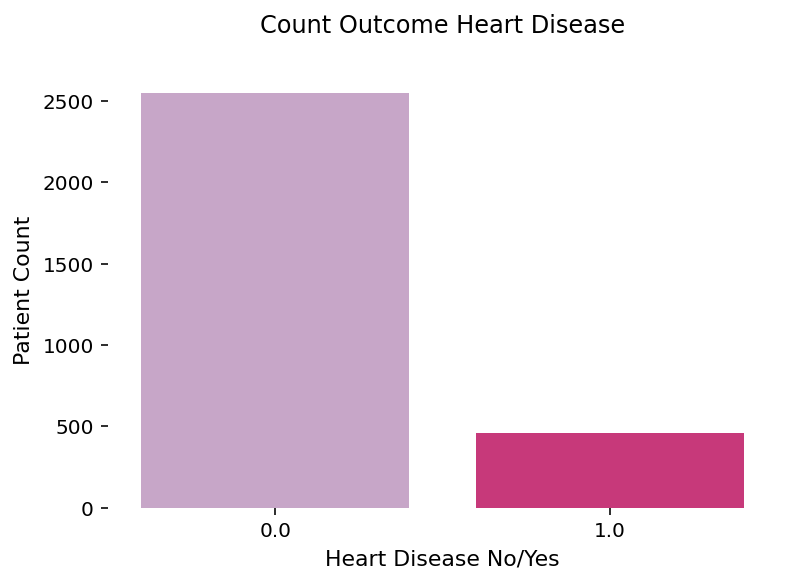

In [32]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="PuRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

### UNDERSAMPLING METHOD

Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


0.0    611
1.0    456
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

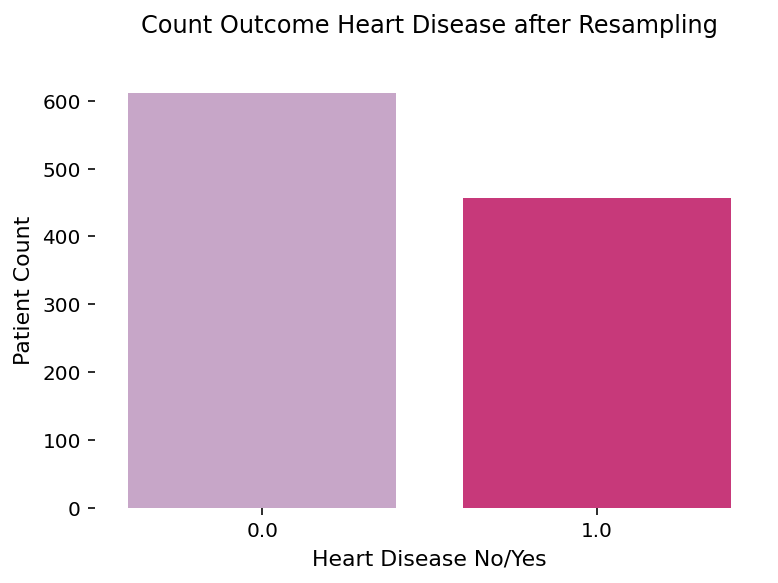

In [33]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="PuRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

> ## **Model Pipeline** <a name="paragraph5"></a>

In [34]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 77.20%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 76.21%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 76.54%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 86.36%


## Modelling & Evaluation (without Pipeline) <a name="paragraph6"></a>

### 1. Logistic Regression

In [35]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 77.2%
The f1 score for LogReg is: 41.199999999999996%
The precision score for LogReg is: 32.7%
The recall score for LogReg is: 55.800000000000004%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

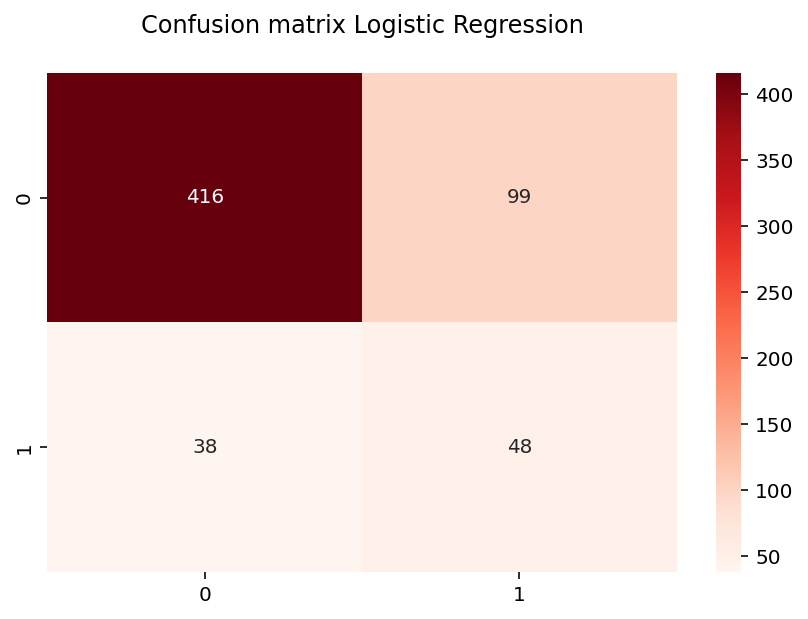

In [36]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

### 2. SVM

In [37]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")


SVC()

The accuracy score for SVM is: 76.2%
The f1 score for SVM is: 40.699999999999996%
The precision score for SVM is: 31.6%
The recall score for SVM is: 56.99999999999999%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

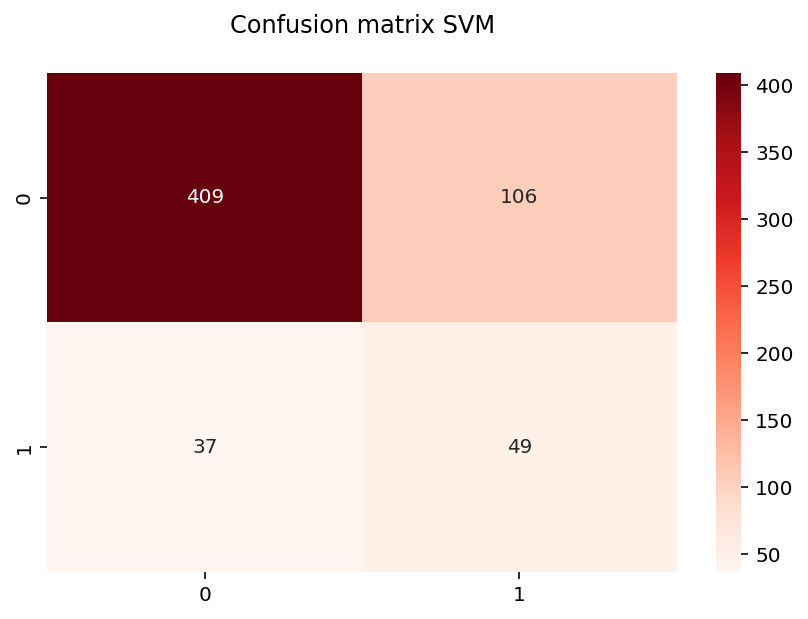

In [38]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

### 3. Decision Tree

In [39]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 77.0%
The f1 score for DTC is: 55.50000000000001%
The precision score for DTC is: 38.4%
The recall score for DTC is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

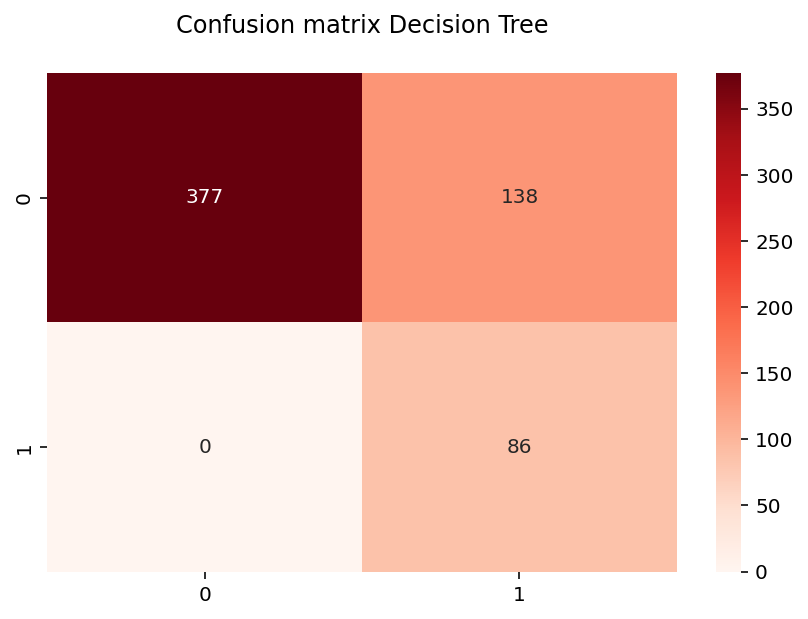

In [40]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


### 4. KNN

In [41]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 86.4%
The f1 score for KNN is: 55.900000000000006%
The precision score for KNN is: 52.0%
The recall score for KNN is: 60.5%


### Result: The KNN model has the highest accuracy score

In [42]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  86.35607321131448 %
The accuracy score of the training data is:  80.22 %


**The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.**

In [43]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

'Cross Validation is used to assess the predictive performance of the models and and to judge \nhow they perform outside the sample to a new data set'

Cross-validated scores: [0.82861897 0.83527454 0.83166667 0.84333333 0.83833333]
The Accuracy of Model with Cross Validation is: 83.54%


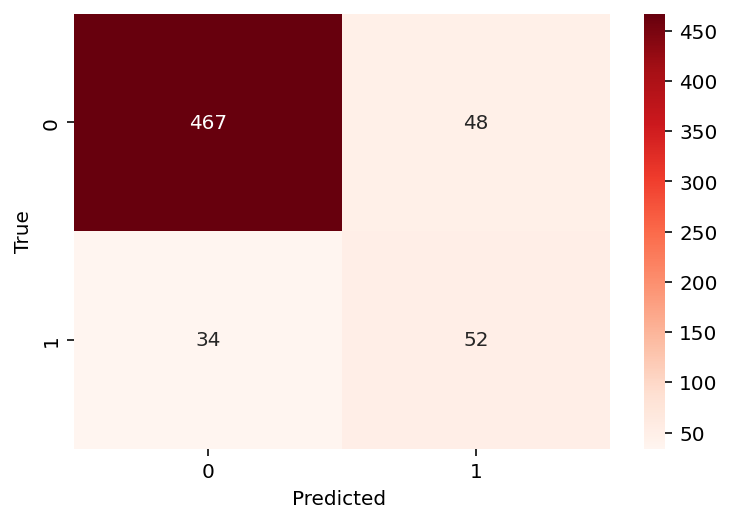

In [44]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


"the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate \nand calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to \ndistinguish between the two outcome classes."

Text(0.5, 1.0, 'ROC CURVE KNN')

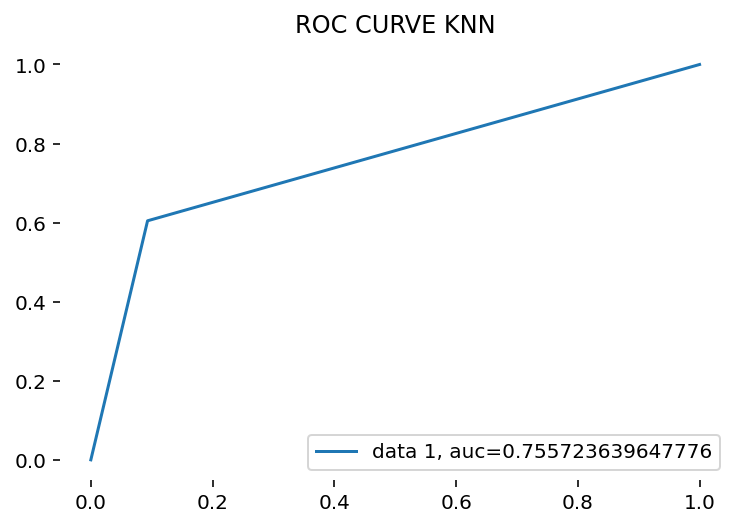

The score for the AUC ROC Curve is: 75.6%


In [45]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

In [48]:
le_df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Applying the model <a name="paragraph7"></a>

In [46]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP','BMI', 'age', 'totChol', 'diaBP', 'glucose', 'cigsPerDay', 'prevalentHyp', 'diabetes', 'BPMeds', 'sex']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 56
Patient's gender. male=1, female=0: >>> 1
Patient's smoked cigarettes per day: >>> 1
Patient's systolic blood pressure: >>> 88
Patient's diastolic blood pressure: >>> 70
Patient's cholesterin level: >>> 452
Was Patient hypertensive? Yes=1, No=0 >>> 0
Did Patient have diabetes? Yes=1, No=0 >>> 1
What is the Patient's glucose level? >>> 255
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- male
Feature names seen at fit time, yet now missing:
- BMI
- heartRate
- is_smoking
- prevalentStroke
- sex

  warnings.warn(message, FutureWarning)


ValueError: ignored